In [184]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Language Processing (Gensim)
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

# Dictionary & Corpora
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel

from gensim.models.ldamodel import LdaModel



In [185]:
mckinsey = pd.read_csv ('mckin_textdf.csv')

In [186]:
ey = pd.read_csv ('ey_textdf.csv')

In [187]:
bcg = pd.read_csv ('bcg_textdf.csv')

In [188]:
aidata = pd.concat([mckinsey, ey, bcg])

In [6]:
print(aidata)

                                                title  \
0   \r\n\tEmbracing technological social responsib...   
1   \r\n\tCapability building: Bridging the gap be...   
2           \r\n\tConfronting AI risks | McKinsey\r\n   
3   \r\n\tThe value AI can bring to your business ...   
4   \r\n\tTackling bias in artificial intelligence...   
5   \r\n\tArtificial intelligence in business | Mc...   
6   \r\n\tThe real-world potential and limitations...   
7   \r\n\tLeading your organization to responsible...   
8   \r\n\tThe ethics of artificial intelligence | ...   
9   \r\n\tAI adoption: Why a digital base is criti...   
10  \r\n\tAI in Europe: Tackling the gap | McKinse...   
11   \r\n\tApplying AI for social good | McKinsey\r\n   
12  \r\n\tModeling the global economic impact of A...   
13  \r\n\tSizing the potential value of AI and adv...   
14  \r\n\tCompeting in the AI economy: An intervie...   
15  \r\n\tThomas L. Friedman: The world’s gone fro...   
16  \r\n\tKai-Fu Lee’s perspect

In [7]:
print(mckinsey['text'][:5])

0     in 1953 us senators grilled general motors ce...
1     the rise of artificial intelligence ai is one...
2     artificial intelligence ai is proving to be a...
3                                                     
4     the growing use of artificial intelligence in...
Name: text, dtype: object


In [8]:
aidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 19
Data columns (total 2 columns):
title    139 non-null object
text     139 non-null object
dtypes: object(2)
memory usage: 3.3+ KB


In [9]:
mckinsey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
title    26 non-null object
text     26 non-null object
dtypes: object(2)
memory usage: 496.0+ bytes


In [10]:
bcg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
title    20 non-null object
text     20 non-null object
dtypes: object(2)
memory usage: 400.0+ bytes


In [11]:
ey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
title    93 non-null object
text     93 non-null object
dtypes: object(2)
memory usage: 1.5+ KB


In [12]:
print(ey)

                                                title  \
0   How digital transformation helped benefit fans...   
1   Six ways the CFO can use artificial intelligen...   
2         How can risk foresight lead to AI insight?    
3   As data personalizes medtech, how will you ser...   
4          How will robots make buildings more human?   
5   How to optimize your intelligent automation build   
6   How to trust the machine: using AI to combat m...   
7   How to give a flying start to your intelligent...   
8                      How to build the digital state   
9   Three ways AI will transform the insurance ind...   
10          How AI is transforming business right now   
11                 How AI is automating intelligently   
12  How a fit tax function functions like a health...   
13       Is AI the start of the truly creative human?   
14  How AI can help defense organizations become s...   
15     How AI and robotics may change tax job duties    
16  How organizations can calib

In [13]:
print(bcg)

                                                title  \
0   Myth vs. Reality in Artificial Intelligence | ...   
1        How to Win with Artificial Intelligence (AI)   
2   The Next Frontier in Digital and AI Transforma...   
3   How AI Could Help—or Hinder—Women in the Workf...   
4   At Anheuser-Busch InBev, Artificial Intelligen...   
5   What's Holding Back Artificial Intelligence - ...   
6                     The Build-or-Buy Dilemma in AI    
7                     The Big Leap Toward AI at Scale   
8   How Artificial Intelligence (AI) Will Reshape ...   
9   AI in the Factory of the Future: The Ghost in ...   
10  Thriving in the Augmented Age: A Conversation ...   
11  How AI and Robotics Will Disrupt the Defense I...   
12  Is Your Business Ready for Artificial Intellig...   
13            Putting Artificial Intelligence to Work   
14  Killer Apps and the Game-Changing Potential of AI   
15    Competing in the Age of Artificial Intelligence   
16  The Integrated Strategy Mac

In [14]:
print(mckinsey)

                                                title  \
0   \r\n\tEmbracing technological social responsib...   
1   \r\n\tCapability building: Bridging the gap be...   
2           \r\n\tConfronting AI risks | McKinsey\r\n   
3   \r\n\tThe value AI can bring to your business ...   
4   \r\n\tTackling bias in artificial intelligence...   
5   \r\n\tArtificial intelligence in business | Mc...   
6   \r\n\tThe real-world potential and limitations...   
7   \r\n\tLeading your organization to responsible...   
8   \r\n\tThe ethics of artificial intelligence | ...   
9   \r\n\tAI adoption: Why a digital base is criti...   
10  \r\n\tAI in Europe: Tackling the gap | McKinse...   
11   \r\n\tApplying AI for social good | McKinsey\r\n   
12  \r\n\tModeling the global economic impact of A...   
13  \r\n\tSizing the potential value of AI and adv...   
14  \r\n\tCompeting in the AI economy: An intervie...   
15  \r\n\tThomas L. Friedman: The world’s gone fro...   
16  \r\n\tKai-Fu Lee’s perspect

In [189]:
from nltk.tokenize import word_tokenize

In [190]:
# Importing stopwords
stopwords_en = stopwords.words('english')


In [191]:

# And now let us make it ready for use.
wordnet_lemmatizer = WordNetLemmatizer()


In [192]:
clean_ai = aidata['text'].map(lambda t: word_tokenize(t))

In [193]:
clean_ai = clean_ai.map(lambda t: [word.lower().strip() for word in t if word.isalpha()])

In [194]:
# lemmatize and removing stopwords
clean_ai = clean_ai.map(
    lambda t: [wordnet_lemmatizer.lemmatize(word) for word in t 
               if word not in stopwords_en])

In [195]:
from gensim.models import Phrases

In [196]:
bigram = Phrases(clean_ai, min_count=1, delimiter=b' ')

In [197]:
for sent in clean_ai:
    bigrams_ = [b for b in bigram[sent] if b.count(' ') == 1]

In [198]:
print(bigrams_)

['robotic process', 'automation rpa', 'artificial intelligence', 'quick win', 'industry banking', 'support function', 'systematically incorporating', 'service organization', 'increase productivity', 'generate insight', 'establish clear', 'business objective', 'optimization effort', 'change management', 'operational function', 'rise robot', 'recent year', 'service organization', 'allows software', 'performed human', 'routine task', 'make mistake', 'reduce cost', 'manual work', 'better worse', 'timeconsuming costly', 'integration however', 'hot topic', 'service organization', 'rpa software', 'overly complex', 'accelerate process', 'started using', 'back forth', 'contract term', 'despite benefit', 'expressed concern', 'job loss', 'affected employee', 'rpa software', 'occur human', 'introduced rpa', 'call center', 'fully automated', 'automated process', 'even ambitious', 'reached new', 'increasingly embedded', 'leave virtual', 'join real', 'implication future', 'competitive advantage', 'le

In [199]:
print(clean_ai)

0     [u, senator, grilled, general, motor, ceo, cha...
1     [rise, artificial, intelligence, ai, one, defi...
2     [artificial, intelligence, ai, proving, double...
3                                                    []
4     [growing, use, artificial, intelligence, sensi...
5                                                    []
6     [episode, mckinsey, podcast, mckinsey, global,...
7     [ceo, often, live, number, earnings, interest,...
8     [click, time, stamp, transcript, listen, relev...
9     [diffusion, new, technology, whether, atm, ban...
10    [many, metric, european, economy, business, gr...
11    [artificial, intelligence, ai, potential, help...
12    [role, artificial, intelligence, ai, tool, tec...
13    [artificial, intelligence, ai, stand, transfor...
14    [faroff, dream, anymore, promise, practical, a...
15    [new, york, time, foreign, affair, columnist, ...
16    [artificial, intelligence, ai, advancing, brea...
17    [artificial, intelligence, ai, cutting, ed

## Erstat unigrams med hyppige bigrams

Følgende finder hyppigste bigrams i corpus og erstatter unigrams med bigram i `clean_ai`

In [200]:
# Konverterer serie til samlet ordliste

con_words = list(clean_ai)

con_wordlist = []
for sublist in con_words:
    for item in sublist:
        con_wordlist.append(item)

In [201]:
# Udleder hyppigste bigrams med nltk.collocations. De hyppigste 10% af bigrams beholdes (con_bi_filt)

import nltk
from nltk import word_tokenize
from nltk.collocations import BigramAssocMeasures

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(con_wordlist)
scored = finder.score_ngrams(bigram_measures.raw_freq)

con_bi_sorted = sorted(scored, key=lambda s: s[1], reverse=True)
con_bi_filt = con_bi_sorted[0:round((0.10*len(con_bi_sorted)))]
print(len(con_bi_sorted),
     len(con_bi_filt))

94584 9458


In [202]:
#con_bi_filt er en tuple med overflødig information. Konverteres til liste af bigrams

con_bi_list = [item[0] for item in list(con_bi_filt)]
con_bi_list = [list(item) for item in con_bi_list]
con_bi_list = [item[0] + " " + item[1] for item in con_bi_list]

In [203]:
#Definerer funktion til at erstatte unigram med bigram

def bigram_insert(tokenlist, bigramlist):    
    for i in range(0, len(tokenlist)-1):
        bigram = tokenlist[i] + " " + tokenlist[i+1]
        if bigram in bigramlist:
            tokenlist[i] = bigram
            tokenlist[i+1] = ""
    tokenlist = list(filter(None, tokenlist))
    return(tokenlist)

In [204]:
#Anvender funktion bigram_insert på clean_ai og erstatter

clean_ai = clean_ai.apply(lambda row: bigram_insert(row, con_bi_list))

In [205]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
print(clean_ai)

In [206]:
dictionary = Dictionary(clean_ai)
corpus = [dictionary.doc2bow(word) for word in clean_ai]
print(corpus[10][:10])

[(0, 1), (8, 1), (16, 3), (23, 1), (26, 2), (27, 1), (28, 1), (34, 1), (41, 4), (51, 1)]


In [207]:
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]
print(tfidf_corpus[:5])

# LDA-Model

In [208]:
# Language Processing (Gensim)


lda_model_5 = LdaModel(tfidf_corpus, id2word= dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [209]:
lda_model_5.print_topics()

[(0,
  '0.000*"reshaping business" + 0.000*"infographic" + 0.000*"survey executive" + 0.000*"intelligence work" + 0.000*"putting artificial" + 0.000*"discussed" + 0.000*"boston consulting" + 0.000*"conducted" + 0.000*"consulting group" + 0.000*"discussion experimentation"'),
 (1,
  '0.000*"ai scale" + 0.000*"fielding" + 0.000*"infographic" + 0.000*"business get" + 0.000*"learn bcg" + 0.000*"conducted interview" + 0.000*"survey executive" + 0.000*"company aim" + 0.000*"boston consulting" + 0.000*"pioneering"'),
 (2,
  '0.000*"based mckinseys" + 0.000*"stamp" + 0.000*"partner london" + 0.000*"mckinsey publishing" + 0.000*"simon" + 0.000*"chris wigley" + 0.000*"section" + 0.000*"audio" + 0.000*"click" + 0.000*"london"'),
 (3,
  '0.000*"vat return" + 0.000*"superfluid market" + 0.000*"rpa solution" + 0.000*"q" + 0.000*"south africa" + 0.000*"oil gas" + 0.000*"roy" + 0.000*"filing" + 0.000*"client china" + 0.000*"morale"'),
 (4,
  '0.000*"take win" + 0.000*"vendor" + 0.000*"health care" + 0

In [60]:
lda_model_5.show_topics(2)

[(3,
  '0.000*"vat return" + 0.000*"superfluid market" + 0.000*"rpa solution" + 0.000*"q" + 0.000*"south africa" + 0.000*"oil gas" + 0.000*"roy" + 0.000*"filing" + 0.000*"client china" + 0.000*"morale"'),
 (4,
  '0.000*"take win" + 0.000*"vendor" + 0.000*"health care" + 0.000*"company" + 0.000*"job" + 0.000*"robot" + 0.000*"human" + 0.000*"think" + 0.000*"machine" + 0.000*"rpa"')]

In [38]:
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model_5.log_perplexity(tfidf_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_5, texts=clean_ai, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)




Perplexity:  -12.154968219029184

Coherence Score:  0.6060670300376894


In [39]:
lda_model_10 = LdaModel(tfidf_corpus, id2word= dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [40]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_10.log_perplexity(tfidf_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_10, texts=clean_ai, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)




Perplexity:  -15.144051360379912

Coherence Score:  0.498030417639501


In [41]:
lda_model_10.show_topics(formatted=False)

[(0,
  [('tom', 5.771368e-05),
   ('coalition', 5.771355e-05),
   ('threetime', 5.7713525e-05),
   ('pulitzer', 5.7713456e-05),
   ('friedman', 5.7713285e-05),
   ('columnist', 5.7713143e-05),
   ('affair', 5.7713103e-05),
   ('prosperity', 5.598489e-05),
   ('thomas', 5.5923854e-05),
   ('chairman', 5.497029e-05)]),
 (1,
  [('port', 5.3432475e-05),
   ('vessel', 5.3380834e-05),
   ('trusted ai', 5.335106e-05),
   ('cathy cobey', 5.334966e-05),
   ('vessel movement', 5.3330536e-05),
   ('arrival time', 5.3330514e-05),
   ('stakeholder impact', 5.3328782e-05),
   ('risk foresight', 5.3328597e-05),
   ('machinery', 5.3324315e-05),
   ('tax authority', 5.3321182e-05)]),
 (2,
  [('uil', 5.4046028e-05),
   ('wealth asset', 5.383693e-05),
   ('wealth service', 5.3813692e-05),
   ('hyperpersonalization', 5.3707947e-05),
   ('uils', 5.3411666e-05),
   ('deliverable', 5.3305834e-05),
   ('wholesaler', 5.3304604e-05),
   ('revamp', 5.330252e-05),
   ('usha', 5.330144e-05),
   ('mark wightman', 5

In [42]:
lda_model_15 = LdaModel(tfidf_corpus, id2word= dictionary,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [43]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_15.log_perplexity(tfidf_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_15, texts=clean_ai, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -19.952868800116985

Coherence Score:  0.4825720669565


In [44]:
lda_model_20 = LdaModel(tfidf_corpus, id2word= dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [45]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_20.log_perplexity(tfidf_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_20, texts=clean_ai, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -26.11531940126384

Coherence Score:  0.4012591218185702


In [ ]:
topics = lda_model_20.show_topics(formatted=False)

# wordcloud 1

In [242]:
topic1 = dict(lda_model_5.show_topic(0, 50))

<Figure size 432x288 with 0 Axes>

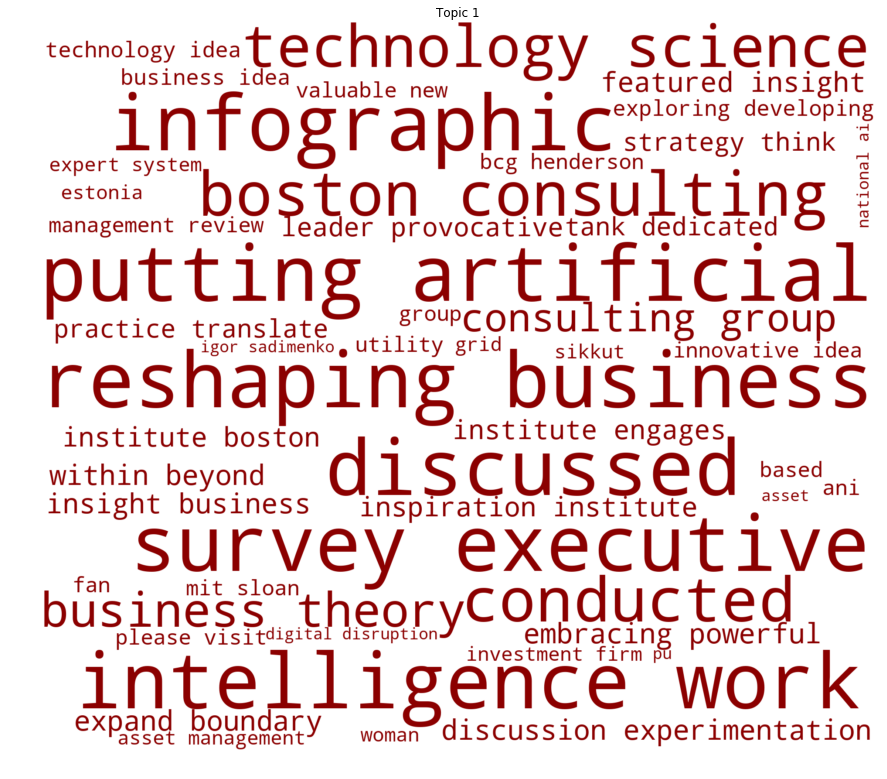

In [243]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
# Generate a word cloud image
wordcloud = WordCloud(width=1920, height=1680, color_func=lambda *args, **kwargs: "darkred", background_color="white").fit_words(topic1)
# Display the generated image:
plt.figure()
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Topic 1')
plt.axis("off")
plt.show()


In [244]:
plt.savefig('topic1.jpg', dpi=300, format='jpg')

<Figure size 432x288 with 0 Axes>

In [245]:
wordcloud.to_file('/Users/Signe/Desktop/CALDISS_AI/topic1.jpg')

# Wordcloud 2

In [246]:
topic2 = dict(lda_model_5.show_topic(1, 50))

<Figure size 432x288 with 0 Axes>

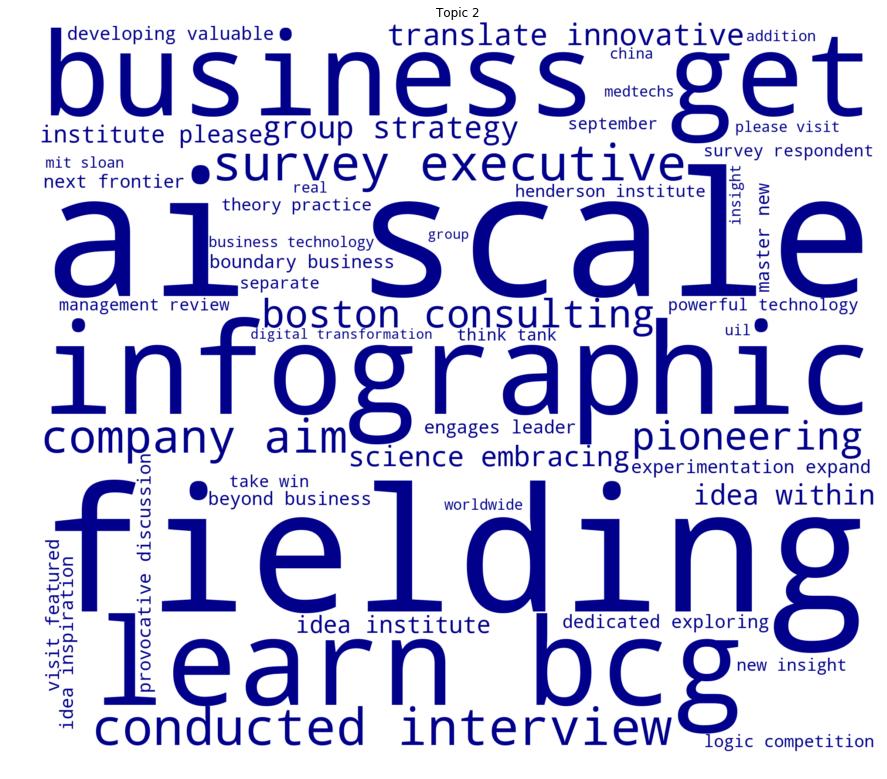

In [247]:
# Generate a word cloud image
wordcloud = WordCloud(width=1920, height=1680, color_func=lambda *args, **kwargs: "darkblue",background_color="white").fit_words(topic2)
# Display the generated image:
plt.figure()
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Topic 2')
plt.axis("off")
plt.show()

In [248]:
plt.savefig('topic2.jpg', dpi=300, format='jpg')
wordcloud.to_file('/Users/Signe/Desktop/CALDISS_AI/topic2.jpg')

<Figure size 432x288 with 0 Axes>

# Wordcloud 3

In [249]:
topic3 = dict(lda_model_5.show_topic(2, 50))

<Figure size 432x288 with 0 Axes>

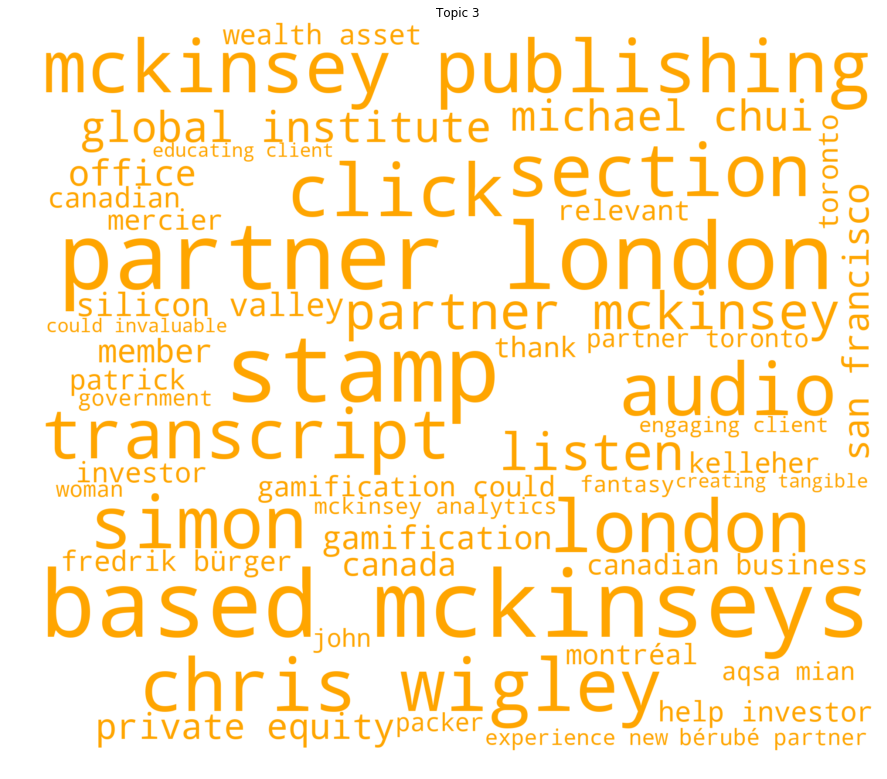

In [250]:
# Generate a word cloud image
wordcloud = WordCloud(width=1920, height=1680, color_func=lambda *args, **kwargs: "orange", background_color="white").fit_words(topic3)
# Display the generated image:
plt.figure()
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Topic 3')
plt.axis("off")
plt.show()

In [251]:
plt.savefig('topic3.jpg', dpi=300, format='jpg')
wordcloud.to_file('/Users/Signe/Desktop/CALDISS_AI/topic3.jpg')

<Figure size 432x288 with 0 Axes>

# Wordcloud 4

In [252]:
topic4 = dict(lda_model_5.show_topic(3, 50))

<Figure size 432x288 with 0 Axes>

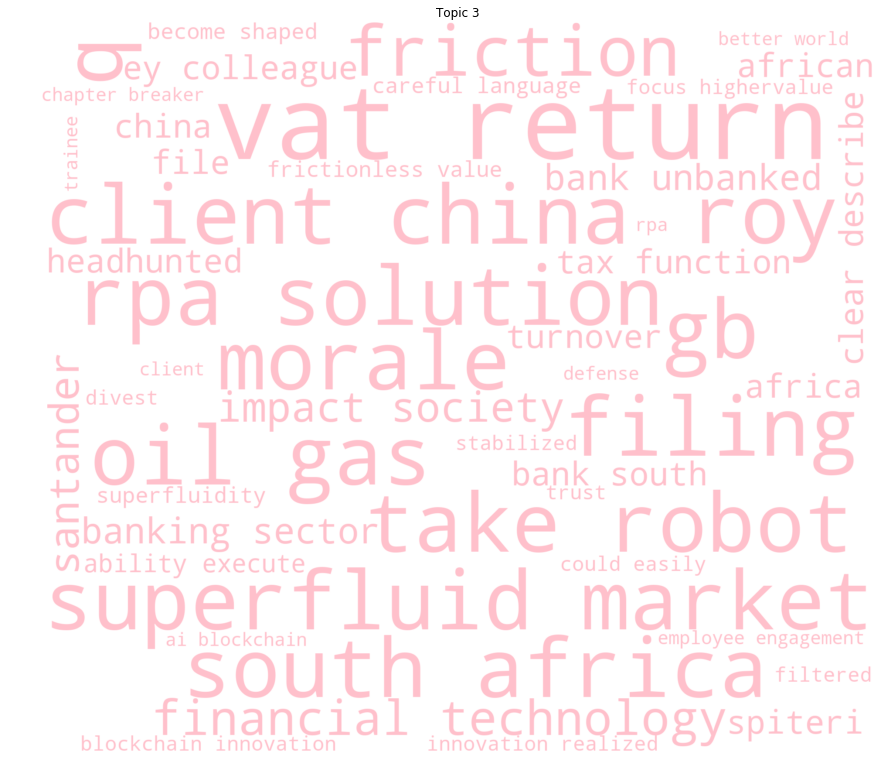

In [253]:
# Generate a word cloud image
wordcloud = WordCloud(width=1920, height=1680, color_func=lambda *args, **kwargs: "pink", background_color="white").fit_words(topic4)
# Display the generated image:
plt.figure()
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Topic 3')
plt.axis("off")
plt.show()

In [254]:
plt.savefig('topic4.jpg', dpi=300, format='jpg')
wordcloud.to_file('/Users/Signe/Desktop/CALDISS_AI/topic4.jpg')

<Figure size 432x288 with 0 Axes>

# Wordcloud 5

In [255]:
topic5 = dict(lda_model_5.show_topic(4, 50))

<Figure size 432x288 with 0 Axes>

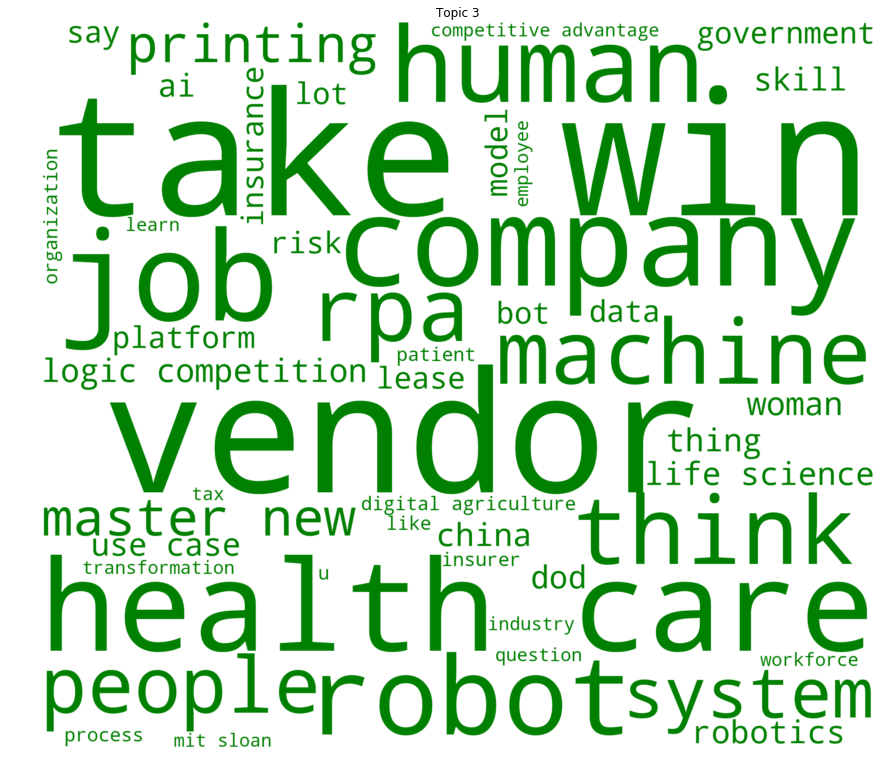

In [256]:
# Generate a word cloud image
wordcloud = WordCloud(width=1920, height=1680, color_func=lambda *args, **kwargs: "green", background_color="white").fit_words(topic5)
# Display the generated image:
plt.figure()
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Topic 3')
plt.axis("off")
plt.show()

In [257]:
plt.savefig('topic5.jpg', dpi=300, format='jpg')
wordcloud.to_file('/Users/Signe/Desktop/CALDISS_AI/topic5.jpg')

<Figure size 432x288 with 0 Axes>